# 러닝 기초 4강(2018.09.01)
***    

* __강의 목표__: Overfitting에 대한 이해

* __이론__: VC 이론, cross-validation, model selection, 복잡도, Shrinkage

* __실습__: 
> - LASSO: sparsity, 파라미터 크기  
 - Ridge: 파라미터 크기  
 - Elastic net(glmnetUtils): 함수의 복잡도 설명  
 - Hyperparameter 튜닝 방법, lambda  


# 4강 Overfitting 관련 질문  

__Q1. feature selection과 lasso/ridge와의 관계__
> 
> 학습 공식: traingingLoss(h) + A * R(h)    
  공식 해석: R(h) < B, 특정 조건 만족하는 상황에서 training Loss를 최소화하자  

> Feature Selection : L0 Norm = 벡터 워소 중 0이 아닌 것의 개수, 적은 수의 파라미터만 0이 아닌 값을 갖도록  
> Lasso : L1 Norm, 전체적인 파라미터 벡트 크기 작아지도록  
> Ridge : L2 Norm, 

--- 

__Q1-2 L0 Norm은 소수의 파라미터만 0이 아닌 값을 가지게 된다고 답 주셨는데, 그건 Lasso의 sparsity 특성 아닌가요?  
L0/L1을 함꼐 이해하려니 혼란스러워요__    

>    

---

__Q2. wine 데이터에서 model_all이랑 model_type의 파라미터 값이 왜 같은지 정확히 이해가 안가요
그래서 tree에서 mtry를 고르는게 좀 헷갈린 거 같기도 하고__

> 제가 질문 자체를 잘못한 것 같아요. 모든 변수를 고려했을 때가 model_all/ 특정 변수만 고려한게 model_type이고   
고려하는 변수가 다르니 결과도 다르다는 것 같아요 
  
<img src="./wine_capture.PNG" width="400">
  
> 쌤 답변: type 변수의 부호가 다른데 이건 해석할 문제가 있을 가능성이 크다는 것.   
modell_all에서는 화이트와인의 질이 낮다는 결론,   
model_type은 화이트와인의 질이 좋다는 결론이 나왔으니까  

__Q3. glmnetUnits(generalized linear model)는 lasso/ridge를 적당히 섞은 건가요?__
> Yes, L1/L2 norm을 모두 사용하는 형태의 regularization임  
> alpha(가중치) 가 1이면 lasso에 가깝고, 0이면 ridge에 가까움   
> lambda(제약화의 세기) 도 하이퍼 파라미터임  

__Q4. validation set approach 안에 kfold와 loo cv 가 있는건가요?   
    아니면 validation set approach는 validation 한번만 한거고 여러번 한것이 cross validation)인건가요? __  
    
>
   
   


A1. 학습이라는게 사실 이런거였죠? 'Training_Loss(h) + (어떤 숫자 A) * R(h)를 최소화하라' 근데 사실 저런 문제를 'R(h) < (어떤 숫자 B)를 만족하면서, Training_Loss(h)를 최소화하라' 이렇게도 쓸 수 있어요. (어떤 숫자 A에 대응되는 어떤 숫자 B가 항상 존재하구요.) 그래서 저 두 최적화 문제는 사실 같은 문제의 서로 다른 두 가지 표현이기 때문에 서로를 Lagrange Dual 관계라고 얘기해요. 수업에서는 전자의 형태로 설명했지만 사실 정성적으로 이해하기에는 후자의 형태가 좀 더 편하죠. R(h)를 L1 norm으로 설정하면 LASSO, L2 norm으로 설정하면 Ridge였죠? L0 norm인 경우가 Feature Selection이라는건데, 왜 그러냐면 L0 norm가 단순히 벡터의 원소 중 0이 아닌 것의 개수이기 때문이에요. 가령 (1,2,3,1,0,0,-1)같은 벡터의 L0 norm은 5라는거죠. 우리가 다루는게 parametric model이니 R(h)를 L0 norm으로 설정하면 파라미터 중 0이 아닌 것의 개수이고, 결국에 학습은 '(파라미터 중 0이 아닌 것의 개수) < (어떤 숫자 B)를 만족하면서, Training_Loss(h)를 최소화하라'가 되겠죠. 가령 (어떤 숫자 B)를 3이라고 한다면, 파라미터 중 0이 아닐 수 있는건 많아봐야 2개겠죠. 선형 회귀의 경우에는 변수 2개만을 선택하는 상황이 될거구요. L0 norm을 사용하는게 적은 수의 파라미터만 0이 아닌 값을 갖도록 강제하는거라면, L1 norm을 사용하는건 전체적인 파라미터 벡터의 크기가 작아지기를 바라는거에요. 그런데 사실상 람다(어떤 숫자 A)를 크게 하면 할수록 학습된 파라미터들은 소수만 0이 아닌 값을 가지게 되고, 결국엔 Feature Selection이 되는것과 비슷한 효과를 준다는겁니다!

A2. 파라미터의 값이 같다는게 정확히 무슨 말인지 잘 모르겠네요. 파라미터의 값이 다르지 않나요? 그것보다 type 변수에 해당하는 파라미터들의 부호가 달라지는데, 그건 해석할 때 문제가 있을 수 있다는거죠. 왜냐면 model_all에서는 화이트와인의 질이 낮다는 결론을 얻고, model_type에서는 반대의 결론이 나오니까요. 이런건 다중공선성 때문에 발생하는 문제인데 다중공선성을 보이는 변수를 빼 주거나 (VIF라는 통계량을 확인합니다.) Ridge regularization을 사용하면 어느 정도 해소가 되기도 합니다. (질문을 제대로 이해했는지 모르겠네요.)

A3. R1(w)을 L1 norm, R2(w)를 L2 norm이라고 하면 elastic net은 'Training_Loss(h) + lambda * (alpha * R1(w) + (1-alpha) * R2(w))를 최소화하라'가 됩니다. alpha가 1이면 LASSO, 0이면 ridge인데, 0과 1 사이의 값을 사용하면 L1, L2 norm을 모두 사용하는 형태의 Regularizaiton이 되겠죠. 따라서 L1와 L2 간 가중치를 조절해주는 alpha, 제약화의 세기를 조절해주는 lambda가 하이퍼파라미터가 됩니다.

A4. 제가 수업에서 설명한 알고리즘은 Decision Tree 중 CART입니다. CART는 회귀, 분류 문제를 푸는데 모두 사용할 수 있는데, 저는 회귀 문제를 푸는 경우에 대해 설명했습니다. 분류 문제는 아주 조금 더 까다로워질 수 있는데, 연습문제 삼아서 한번 해 보시는걸 추천드려요. 아마 교재들에서는 "불순도를 최소화하도록 split한다"라고 써 있을텐데, 이렇게 생각하시는 것 보다 Logistic Regression에서 했던것처럼 "logloss를 최소화한다"라고 생각해보시고 이게 곧 "불순도를 최소화한다"와 같은 말이라는걸 유도해보시면 좋을 것 같네요.

A5. 앙상블은 모델 여러개를 합치는 기법들을 모두 그렇게 부릅니다. bagging과 boosting은 앙상블 기법의 일종이구요. (이외에 stacking이라는 기법도 존재합니다.) 랜덤포레스트는 decision tree로 구성된 bagging의 특별한 경우라고 보시면 될 것 같아요.

A6. bagging과 boosting은 다 "나무1 + 나무2 + ... + 나무B" 이렇게 생겼습니다. 그런데 나무를 어떻게 만들어 나가느냐의 차이죠. bagging은 '샘플링 -> 나무1', '샘플링 -> 나무2', ... 이렇게 만들어 나간다면 boosting은 '나무1 -> 나무2 -> ...' 이런 식으로 만들어집니다.

A7. 랜덤 포레스트나 bagging이 그렇습니다. 나무의 개수를 정해주지 않아도 된다기 보다는, 일정 갯수 이상의 나무를 사용하면 성능이 나빠지지도 좋아지지도 않기 때문에 주의깊게 튜닝해줄 필요가 없다는 의미입니다.

A8. mtry는 랜덤 포레스트를 구성하는 개별적인 나무들이 자라 나갈 때, 그냥 자라는게 아니라 랜덤하게 자라도록 제어해주는 역할을 했었죠. (가지를 한번 나눌 때, 모든 input을 고려하지 않고 랜덤추출한 특정한 input만 고려)

In [18]:
#기본 옵션dd
options(repr.plot.width=4, repr.plot.height=3)
options(scipen=999)

***

__요약__     
 
1. 과적합의 정의
> 모델이 과도하게 학습이 되어, 크게 의미 없는 함수가 나오는 현상
  수식:  Ê(ĥ) < E(ĥ), E(ĥ)> Ê(h)
  설명: training error(선택된 함수) < training error(전체 함수), 
      일반화 오류(train set 함수) < 일반화 오류(전체 함수)
        
2. 머신러닝의 목적  
> 예측이 목적, but 통계는 어떤 방향으로 학습(learning)하는지를 알 수 있음  
 vc 이론을 통해 어디까지 학습해야하는지 알 수 있음
 
3. VC Inequality theory 
> Ê(ĥ) < E(ĥ) < Ê(ĥ) + bound  
 구할 수있는 값, training error<Ê(ĥ)> 로 구할 수 없는 generalization error<E(ĥ)> 추측

>  목적: 모든 data가 아닌 training set에 대한 예측 오차를 가장 작게 하는 함수를 찾자
 ex) " 나의 키 < 100대 조상의 키 < 나의 키 + 10cm " 일 것이다.
     
4. model assesment 
> 기본 구조 (train > validation > test set)

5. validation set을 사용하는 이유
> 모델의 성능 평가 /모델의 성능 상승
  validation accuracy가 낮으면 overfitting 가능성 높음

6. validation 나누는 기준  
> validation set approach  
> K-fold cv (cross validation)  
  LOO CV (leave one out cross-validation)  
  
7. 함수의 복잡도  
> R(h), 함수의 크기, 파라미터의 크기  

8. feature selection 
> Q. feature selection이 정확히 뭔지 모르겠어요. '특징을 선택하고, 원본 데이터의 불필요한 특징 제거'로 이해해서 shrinkage랑 비슷한거 같기도 하고   

    > ||w||0: feature selection    

    > ||w||1: LASSO regularization (Least Absolute Shrinkage and Selection) 
       ~ feature selection 기능 있음, sparcity
       λ가 빠르게 일부 데이터가 변함

    > ||w||2: Ridge regularization (산등성이)
       λ가 천천히 모든 데이터가 변함
 
9. error와 복잡도를 고려하는 함수  
> argmin { a * Ê(h) + λ * R(h)}  
> 'error + 복잡도' 최소화  
> 모델 선택 = 함수 선택 = λ 선택 = hyper parameter 튜닝  


# 1. sparcity가 있는 데이터  불러오기

In [19]:
# 데이터 불러오기
# sparcity가 있도록 만든 데이터임!
data4_2 <- read.csv("data4_2.csv", header = TRUE) #한글 깨지지 않으려면 encoding="utf-8" 하면됨

dim(data4_2)
str(data4_2)
summary(data4_2)

data4_2

[1] 10  2

'data.frame':	10 obs. of  2 variables:
 $ input : num  1.236 1.321 1.681 0.201 -1.328 ...
 $ output: num  1.019 0.88 0.924 0.192 -1.071 ...


     input              output         
 Min.   :-1.32752   Min.   :-1.071428  
 1st Qu.: 0.07292   1st Qu.:-0.003459  
 Median : 1.13277   Median : 0.828508  
 Mean   : 0.67780   Mean   : 0.367047  
 3rd Qu.: 1.35469   3rd Qu.: 0.898154  
 Max.   : 2.12212   Max.   : 1.018728  

input,output
1.23614288,1.01872766
1.32125747,0.87973679
1.68123559,0.92391037
0.20090028,0.19218711
-1.32752445,-1.07142803
2.12212153,0.81891040
0.03025799,-0.06867429
1.36583766,0.90429301
-0.88166006,-0.76530006
1.02938745,0.83810628


# 2. Linear model 함수 적용


Call:
lm(formula = output ~ input, data = test_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48334 -0.11517  0.03765  0.12446  0.29015 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -0.07183    0.08931  -0.804     0.445    
input        0.64750    0.07037   9.202 0.0000157 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2388 on 8 degrees of freedom
Multiple R-squared:  0.9137,	Adjusted R-squared:  0.9029 
F-statistic: 84.67 on 1 and 8 DF,  p-value: 0.00001574


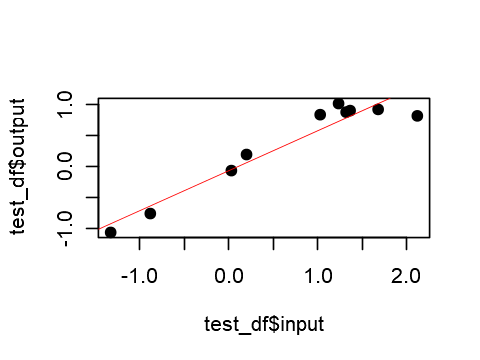

In [20]:
# Linear model 함수 적용
test_df <- data4_2

model <- lm(formula=output ~ input, data=test_df)
summary(model)

plot(test_df$input, test_df$output, pch=19, cex=1)
abline(model, lwd = 0.5, col="red")

# 3. k-fold (k등분)


In [21]:
# k 등분해서 진행하기  
test_df <- data4_2

model <- lm(formula=output ~ input, data=test_df[-c(1,5,8),])

#10 개 중 3개 추출
pred <- predict(model, test_df[c(1,5,8), ])
real <- test_df$output[c(1,5,8)]
validation_error <- mean( (real-pred)^2 )

cat("예측: " , pred, "\n")
cat("실제: " , real, "\n")
cat("<오류>: " , validation_error, "\n")

예측:  0.6614561 -0.8129404 0.7360451 
실제:  1.018728 -1.071428 0.904293 
<오류>:  0.07425539 


# 4. LOO Cross Valiation (leave one out cross-validation)

In [22]:
test_df <- data4_2
total_basket <- data.frame(matrix(ncol = 4, nrow = 0)) # (6*0)표 만들고
colnames(total_basket) <- c("k차함수","i번째 학습", "error", "error_ratio") # header 만들고

for (k in 1:7){
    cat("\n<", k, ">차 함수 시작합니다.")
    validation_error <- 0
    
    for (i in 1:10){
        model <- lm(output ~ poly(input, k), data=test_df[-i,])
        pred <- predict(model, test_df[i, ])
        real <- test_df$output[i]
        validation_error <-  + mean( (real-pred)^2 )
        validation_error_ratio <- validation_error/10
    }
    total_basket[nrow(total_basket) + 1,] = list(k, i, validation_error, validation_error_ratio)
}



< 1 >차 함수 시작합니다.
< 2 >차 함수 시작합니다.
< 3 >차 함수 시작합니다.
< 4 >차 함수 시작합니다.
< 5 >차 함수 시작합니다.
< 6 >차 함수 시작합니다.
< 7 >차 함수 시작합니다.

k차함수,i번째 학습,error,error_ratio
1,10,0.074918972,0.0074918972
2,10,0.016616469,0.0016616469
3,10,0.001370623,0.0001370623
4,10,0.001478596,0.0001478596
5,10,0.002006433,0.0002006433
6,10,0.015196429,0.0015196429
7,10,0.136079451,0.0136079451


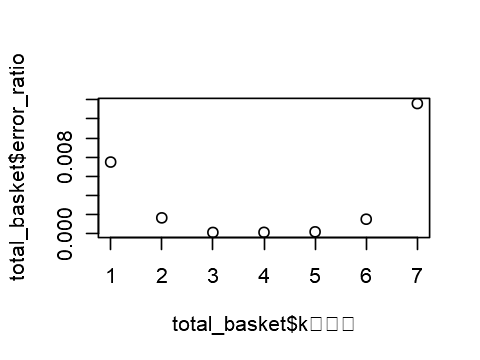

In [23]:
total_basket
plot(total_basket$k차함수, total_basket$error_ratio)

__해석__
3차 함수에서 에러_ratio가 가장 낮음  
> 5, 6,7차 함수는 overfitting  
1,2차 함수는 underfitting


# 5. 와인 데이터 불러오기

In [24]:
data4_1 <- read.csv("data4_1.csv", header = TRUE) #한글 깨지지 않으려면 encoding="utf-8" 하면됨

# lm  
test_df <- data4_1

model_all <- lm(quality ~. , data=test_df)
model_type <- lm(quality ~ type , data=test_df)
model_residual_sugar <- lm(quality ~ residual_sugar , data=test_df)

cat("<mode_all> ")
model_all 

<mode_all> 


Call:
lm(formula = quality ~ ., data = test_df)

Coefficients:
         (Intercept)         fixed_acidity      volatile_acidity  
          104.751754              0.085066             -1.492406  
         citric_acid        residual_sugar             chlorides  
           -0.062621              0.062437             -0.757251  
 free_sulfur_dioxide  total_sulfur_dioxide               density  
            0.004937             -0.001403           -103.909624  
                  pH             sulphates               alcohol  
            0.498756              0.721744              0.222670  
                type  
           -0.361332  


In [25]:
cat("<model_type> ")
model_type

<model_type> 


Call:
lm(formula = quality ~ type, data = test_df)

Coefficients:
(Intercept)         type  
     5.6360       0.2419  


In [26]:
cat("<model_residual_sugar>")
model_residual_sugar

<model_residual_sugar>


Call:
lm(formula = quality ~ residual_sugar, data = test_df)

Coefficients:
   (Intercept)  residual_sugar  
      5.855323       -0.006787  


__stepwise Regression__  
input의 갯수가 늘어나면 고려해야되는 가설공간이 2배 늘어남,   
지금은 파라미터가 12개니까 `r 2^12` 개가 나옴 (2^12)     
기하급수적으로 늘어나는 것은 컴퓨터 공학에서 풀 수 없다고 봄     
 
  1. 12*11 / 2로 계산할 수 있음. 4097번이 67으로 줄어들기 때문에, 변수 선택에 중요한 영향을 줌  
  2. (통계) 중요한 변수만 들어가면 설명이 가능함  
  3. (머신러닝) 중요한 변수만 들어가면 노이즈를 줄임(오버피팅 방지, 가설공간 줄임)  


In [27]:
### model_acid_type 결과 보기  

test_df <- data4_1

model_acid_type <- lm(quality ~ fixed_acidity + type, data=test_df)
colnames(test_df)

model_acid_type

[1] "fixed_acidity"        "volatile_acidity"     "citric_acid"         
 [4] "residual_sugar"       "chlorides"            "free_sulfur_dioxide" 
 [7] "total_sulfur_dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"             
[13] "type"


Call:
lm(formula = quality ~ fixed_acidity + type, data = test_df)

Coefficients:
  (Intercept)  fixed_acidity           type  
      5.77309       -0.01647        0.21775  


lm 에 type 추가  
여기서 +는 수치를 더하는것이 아니라 파라미터 하나 더 추라하는 것  
  
red가 1, white가 0이니까 red wine가 0.21775의 가중치를 가짐, 1.21775가 더 크다고 볼 수 있다.  


# 6. 함수의 복잡도 설명 (glmnetUtils)

The glmnetUtils package provides a collection of tools to streamline the process of fitting elastic net models with glmnet. 

elastic net models: Elastic Net 회귀 모형은 가중치의 절대값의 합과 제곱합을 동시에 제약 조건으로 가지는 모형이다.
    L1 + L2도 하자.
    튜닝파라미터
    람다 : 정규화를 얼마나 강하게 할 것이냐? 높으면 정규화가 높다. (모델이 단순하게) 적게 하면 예측률이 높아질듯.
    알파 : L1,L2를 몇대 몇으로 할것이냐. 0~1, 알파 : 0 릿지만, 알파 : 1 라쏘만.
    
    -> 알파와 라쏘를 섞어서 일정 비율로 섞는 하이퍼 파라미터를 사용 
https://byungjun0689.github.io/R_for_Data_Science(Machine_Learning_with_R)/

In [28]:
library("glmnetUtils")
data4_3 <- read.csv("data4_3.csv", header = TRUE) #한글 깨지지 않으려면 encoding="utf-8" 하면됨

test_df <- data4_3
colnames(test_df)

[1] "Y"    "X1"   "X2"   "X3"   "X4"   "X5"   "X6"   "X7"   "X8"   "X9"  
 [11] "X10"  "X11"  "X12"  "X13"  "X14"  "X15"  "X16"  "X17"  "X18"  "X19" 
 [21] "X20"  "X21"  "X22"  "X23"  "X24"  "X25"  "X26"  "X27"  "X28"  "X29" 
 [31] "X30"  "X31"  "X32"  "X33"  "X34"  "X35"  "X36"  "X37"  "X38"  "X39" 
 [41] "X40"  "X41"  "X42"  "X43"  "X44"  "X45"  "X46"  "X47"  "X48"  "X49" 
 [51] "X50"  "X51"  "X52"  "X53"  "X54"  "X55"  "X56"  "X57"  "X58"  "X59" 
 [61] "X60"  "X61"  "X62"  "X63"  "X64"  "X65"  "X66"  "X67"  "X68"  "X69" 
 [71] "X70"  "X71"  "X72"  "X73"  "X74"  "X75"  "X76"  "X77"  "X78"  "X79" 
 [81] "X80"  "X81"  "X82"  "X83"  "X84"  "X85"  "X86"  "X87"  "X88"  "X89" 
 [91] "X90"  "X91"  "X92"  "X93"  "X94"  "X95"  "X96"  "X97"  "X98"  "X99" 
[101] "X100"

In [29]:
test_df <- data4_3

model <- lm(Y ~., test_df)
model


Call:
lm(formula = Y ~ ., data = test_df)

Coefficients:
(Intercept)           X1           X2           X3           X4           X5  
   1.257008     1.065963     0.023143     0.023425    -0.069477    -0.080231  
         X6           X7           X8           X9          X10          X11  
   0.056536    -0.035723    -0.031815     0.152955    -0.012982    -0.064110  
        X12          X13          X14          X15          X16          X17  
   0.017474     0.117016    -0.032945     0.015036    -0.246596    -0.108870  
        X18          X19          X20          X21          X22          X23  
  -0.131736     0.181305    -0.006779     0.112091     0.095405     0.063288  
        X24          X25          X26          X27          X28          X29  
  -0.052944    -0.003376    -0.026710     0.247813    -0.009410    -0.048134  
        X30          X31          X32          X33          X34          X35  
  -0.044487    -0.095561    -0.156647    -0.042266     0.112269     0.193

In [30]:
# lambda는 1일 때
test_df <- data4_3
set.seed(123)

train <- sample(1:nrow(test_df), 0.7 * nrow(test_df))

model <- glmnet(Y ~., 
                    data = test_df[train, ],
                    lambda = 1 ) # 70% 선택했으니 train set

pred <- predict(model, test_df[-train, ])
real <- test_df$Y[-train]
validation_Error <- mean((real - pred) ^ 2)

validation_Error

[1] 4.671785

In [31]:
# lambda는 가 list일때 
total_basket2 <- data.frame(matrix(ncol = 2, nrow = 0)) # (6*0)표 만들고
colnames(total_basket2) <- c("lambda", "error") # header 만들고

lambda_example = list(0, 0.1, 0.5, 1)

for (lambda in lambda_example){
    test_df <- data4_3
    set.seed(123)
    
    train <- sample(1:nrow(test_df), 0.7 * nrow(test_df))
    model <- glmnet(Y ~., 
                        data = test_df[train, ],
                        lambda = lambda ) # 70% 선택했으니 train set

    pred <- predict(model, test_df[-train, ])
    real <- test_df$Y[-train]
    validation_Error <- mean((real - pred) ^ 2)

    cat('\nlambda ', lambda, '의 validation_error는 ' , validation_Error , '입니다.')
    total_basket2[nrow(total_basket2) + 1,] = list(lambda, validation_Error)
}


lambda  0 의 validation_error는  2.816874 입니다.
lambda  0.1 의 validation_error는  1.041327 입니다.
lambda  0.5 의 validation_error는  1.723713 입니다.
lambda  1 의 validation_error는  4.671785 입니다.

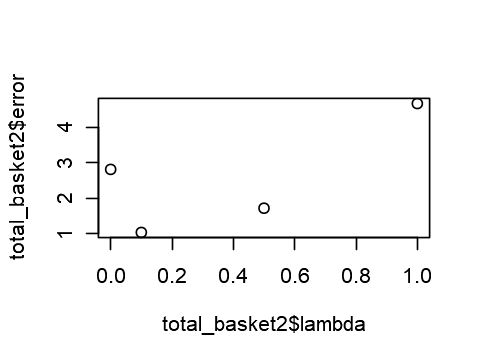

In [32]:

plot(total_basket2$lambda, total_basket2$error)

In [33]:
# sample() 함수  
#  무작위로 특정 행까지 뽑는 함수, 반복해서 실행하면 다르게 나옴
sample(c(1,2,3,4), 3)
sample(c(1,2,3,4), 2)
sample(c(1,2,3,4), 4)

[1] 2 4 1

[1] 1 3

[1] 1 4 3 2

In [34]:
# sample() 함수  
set.seed(123)
# set.seed 해주면 변하지 않음
sample(c(1,2,3,4), 3)
sample(c(1,2,3,4), 2)
sample(c(1,2,3,4), 4)

[1] 2 3 1

[1] 4 3

[1] 1 2 3 4

__6강에서 배울 내용__  

>kaggle 데이터 실습  
